In [1]:
from lib import *

Pipeline = pipeline.Pipeline
RegressionValidator = pipeline.RegressionValidator

DatasetProvider = provider.DatasetProvider
DatasetUploader = provider.DatasetUploader

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm._tqdm_notebook import tqdm_notebook
from tqdm._tqdm_notebook import tqdm
tqdm_notebook.pandas()

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/tmp/ipykernel_11277/2147512924.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [3]:
import pickle

def load_pickle(dataset, name):
    dataset.to_pickle(name + '.pkl')

def from_pickle(path):
    with open(path, 'rb') as reader:
        return pickle.load(reader)

In [4]:
idx = from_pickle('tmp/idx.pkl').rename({'id': 'object_id'}, axis=1)

In [5]:
errors = from_pickle('tmp/xgb_error.pkl')

In [6]:
errors

(19.271542614573367,
 array([-0.00178237, -0.00266869,  0.00339952, ...,  0.00453052,
         0.00647632,  0.00647632], dtype=float32),
          target
 id             
 54          0.0
 114         0.0
 174         0.0
 234         0.0
 294         0.0
 ...         ...
 1330036     0.0
 1330090     0.0
 1330142     0.0
 1330150     0.0
 1330156     0.0
 
 [422577 rows x 1 columns])

In [7]:
def get_statistics(report):
    stat = report[2]
    stat['residuals'] = report[1] - report[2].target
    stat['predicted'] = report[1]
    stat['object_id'] = report[2].index
    return stat

In [8]:
report = get_statistics(errors)

In [9]:
report = report.merge(idx, on='object_id', how='left')

<AxesSubplot:xlabel='residuals'>

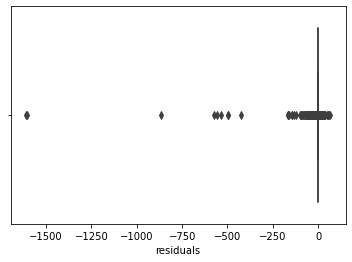

In [10]:
sns.boxplot(data=report, x='residuals')

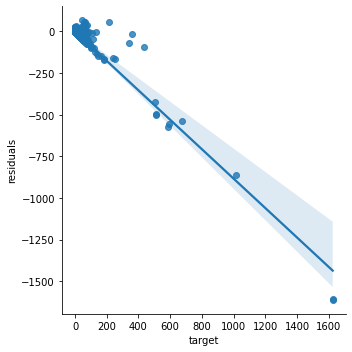

In [11]:
sns.lmplot(data=report, x='target', y='residuals')

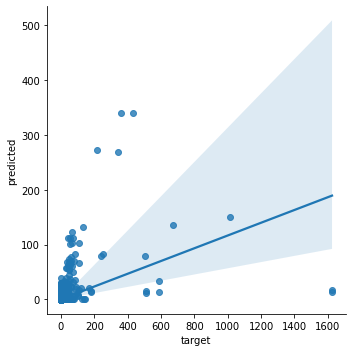

In [12]:
sns.lmplot(data=report, x='target', y='predicted')

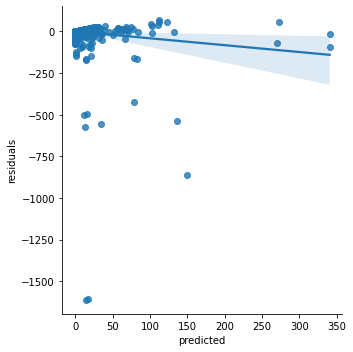

In [13]:
sns.lmplot(data=report, x='predicted', y='residuals')

### Base summary:

1) Obvious underfitting 
2) High target values in most cases are low constant predicted

# Explore specific objects 